# Mount Drive with Colab

In [99]:
from google.colab import drive
drive.mount("/content/mydrive/")

Mounted at /content/mydrive/


# Import Libraries

In [100]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import layers

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications.vgg16 import VGG16

# Load Dataset

In [101]:
directory_link="/content/mydrive/MyDrive/Forest-Fire-Classification-main/Forest-Fire-Classification-main/Forest Fire Dataset"
directory=os.listdir(directory_link)
print("Names of Directory :" , directory )
print("Number of Directory :" , len(directory))

Names of Directory : ['Testing', 'Training']
Number of Directory : 2


In [102]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing and Feature Engineering

In [103]:
data='/content/drive/MyDrive/Forest-Fire-Classification-main/Forest-Fire-Classification-main/Forest Fire Dataset/Training'

In [104]:
batch_size = 32
img_height = 180
img_width = 180

In [105]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="training",
  shuffle=True,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1520 files belonging to 2 classes.
Using 1216 files for training.


In [107]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="validation",
  shuffle=True,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1520 files belonging to 2 classes.
Using 304 files for validation.


In [108]:
class_names = train_ds.class_names
print("Class:" , class_names)
print("No of Classes :" , len(class_names))

Class: ['fire', 'nofire']
No of Classes : 2


# Visulization

### RGB Images

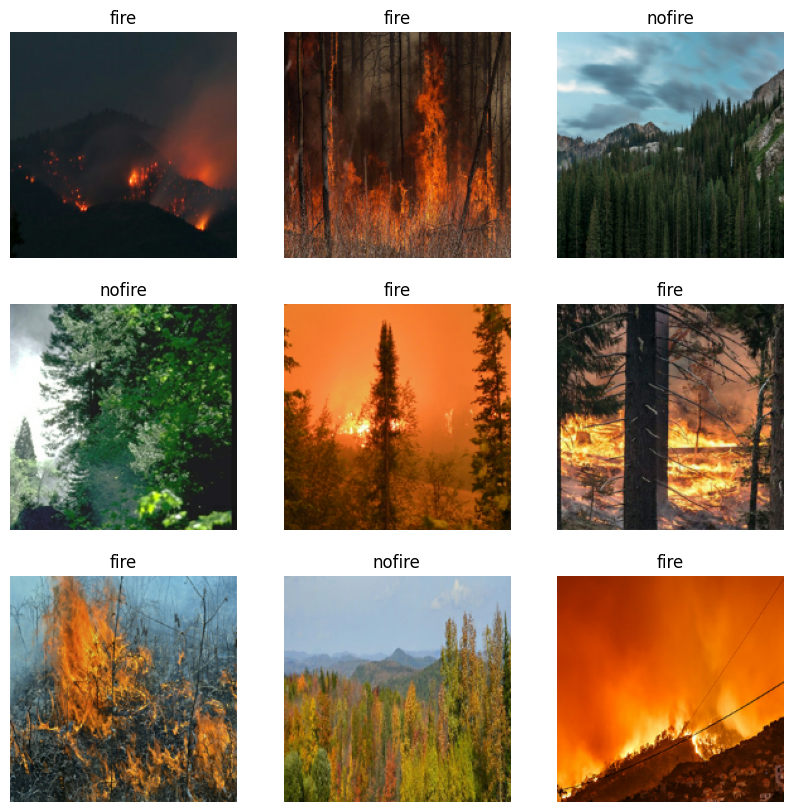

In [109]:
plt.figure(figsize=(10, 10))
for images, label in train_ds.take(5):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")

### RGB Images Convert Into GrayScale

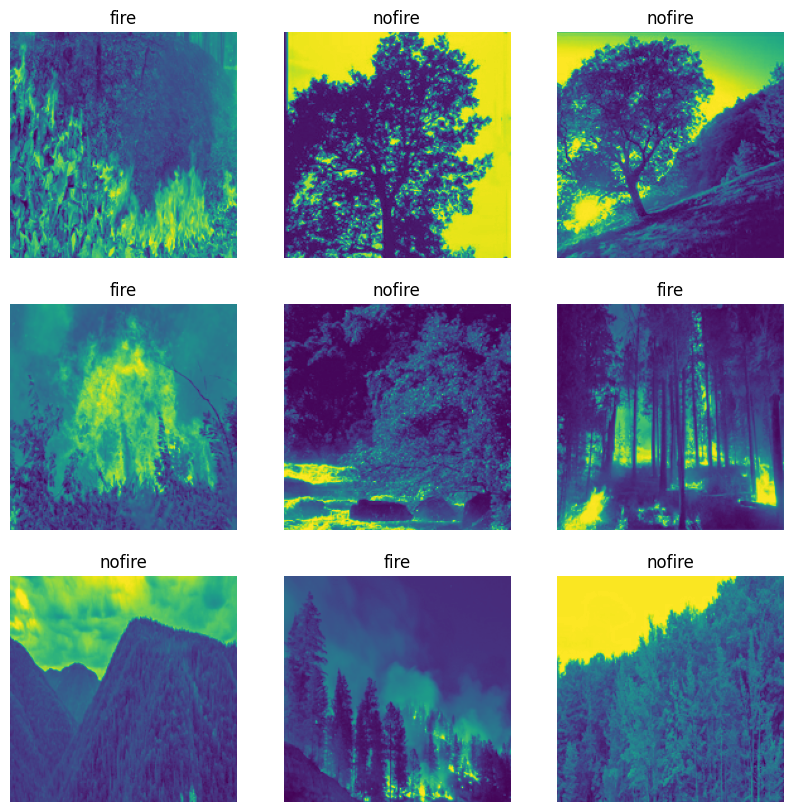

In [110]:
plt.figure(figsize=(10, 10))
for images, label in train_ds.take(5):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    gray_image = tf.image.rgb_to_grayscale(images[i])

    plt.imshow(gray_image.numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")


### Normalize Images

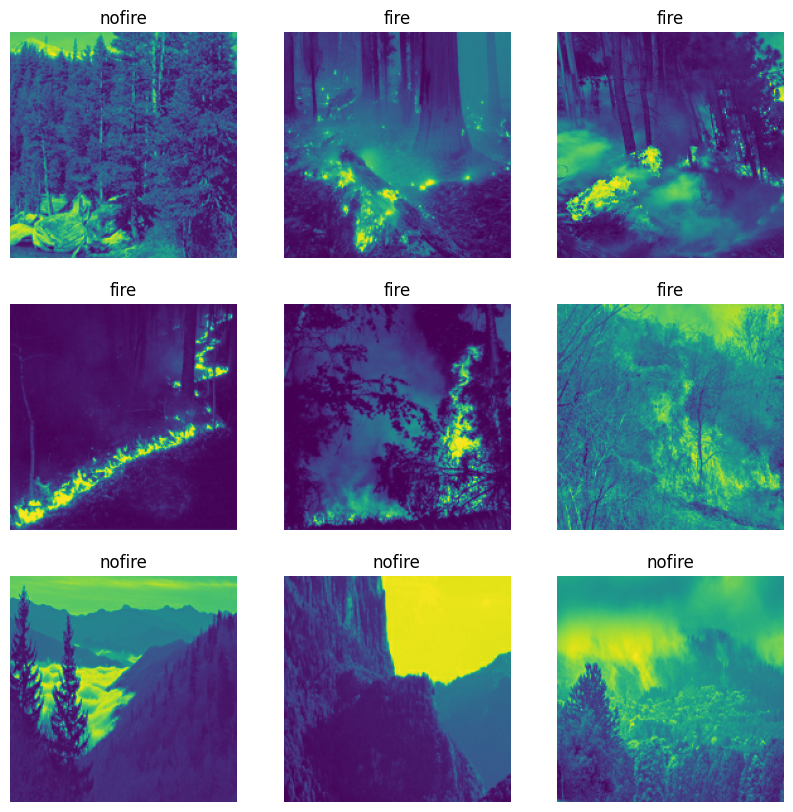

In [111]:
plt.figure(figsize=(10, 10))
for images, label in train_ds.take(5):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    gray_image = tf.image.rgb_to_grayscale(images[i])
    norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))

    plt.imshow(norm_image)
    plt.title(class_names[label[i]])
    plt.axis("off")

# Conv2D Network

Model Building

In [112]:
num_classes = len(class_names)

model_conv2 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [113]:
model_conv2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [114]:
model_conv2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_13 (Rescaling)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,988,898 (15.22 MB)

 Trainable params: 3,988,898 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [115]:
epochs=10
history = model_conv2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.7652 - loss: 0.4678 - val_accuracy: 0.9178 - val_loss: 0.2366
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.9432 - loss: 0.1398 - val_accuracy: 0.9539 - val_loss: 0.1402
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.9488 - loss: 0.1176 - val_accuracy: 0.9507 - val_loss: 0.1264
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9727 - loss: 0.0880 - val_accuracy: 0.9605 - val_loss: 0.1058
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9761 - loss: 0.0700 - val_accuracy: 0.9638 - val_loss: 0.1130
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9806 - loss: 0.0579 - val_accuracy: 0.9671 - val_loss: 0.1098
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9773 - loss: 0.0682 - val_accuracy: 0.9737 - val_loss: 0.1133
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9863 - loss: 0.0445 - val_accuracy: 0.9539 - val_loss:

### Evaluation

In [116]:
test1=model_conv2.evaluate(val_ds)


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 480ms/step - accuracy: 0.9555 - loss: 0.1865


### Create plots of the loss and accuracy on the training and validation sets

Text(0.5, 1.0, 'Training and Validation Accuracy')

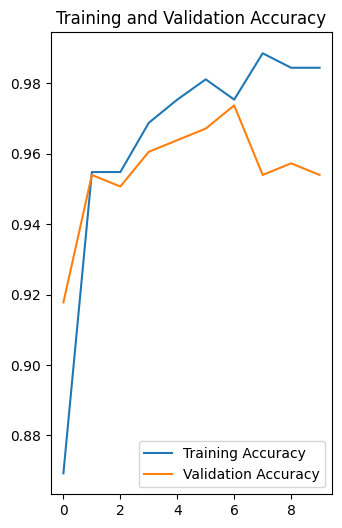

In [117]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

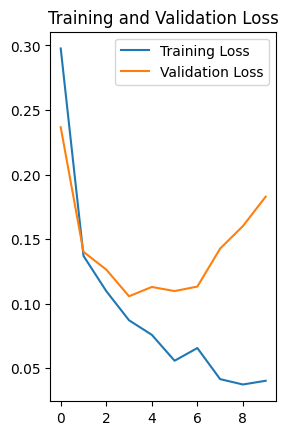

In [118]:

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### ResNet50 Model

Build the Model

In [119]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
for layer in resnet_50.layers:
    layer.trainable = False

In [120]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [121]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

In [122]:
# launch the training
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 266s 7s/step - accuracy: 0.5570 - loss: 1.1169 - val_accuracy: 0.9539 - val_loss: 0.1481
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 222s 6s/step - accuracy: 0.9084 - loss: 0.2609 - val_accuracy: 0.9770 - val_loss: 0.0832
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 302s 7s/step - accuracy: 0.9664 - loss: 0.1007 - val_accuracy: 0.9803 - val_loss: 0.0799
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 222s 6s/step - accuracy: 0.9735 - loss: 0.0919 - val_accuracy: 0.9737 - val_loss: 0.0871
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 298s 7s/step - accuracy: 0.9825 - loss: 0.0574 - val_accuracy: 0.9671 - val_loss: 0.1364
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 262s 7s/step - accuracy: 0.9707 - loss: 0.0901 - val_accuracy: 0.9704 - val_loss: 0.0563
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 220s 6s/step - accuracy: 0.9814 - loss: 0.0549 - val_accuracy: 0.9803 - val_loss: 0.0738
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 266s 6s/step - accuracy: 0.9937 - loss: 0.0338 - val_accuracy: 0.9671 - v

# Evaluation

In [123]:
test2=model.evaluate(val_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.9770 - loss: 0.0855


### Create plots of the loss and accuracy on the training and validation sets

Text(0.5, 1.0, 'Training and Validation Accuracy')

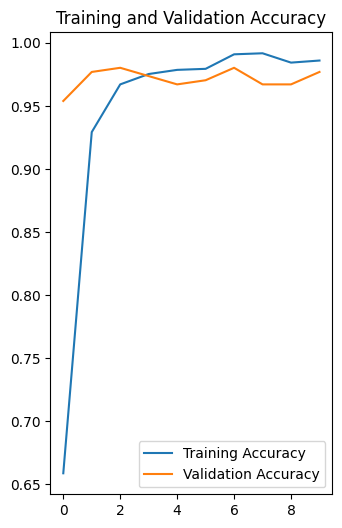

In [124]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

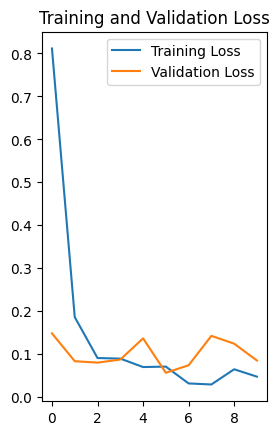

In [125]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **EfficientNetB0**

Model Building


In [126]:
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



In [127]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# Freeze the base model
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Optional dropout for regularization
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13            │ (None, 180, 180, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_16 (Rescaling)  │ (None, 180, 180, 3)    │              0 │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_7           │ (None, 180, 180, 3)    │              7 │ rescaling_16[0][0]     │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_17 (Rescaling)  │ (None, 180, 180, 3)    │              0 │ normalization_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 181, 181, 3)    │              0 │ rescaling_17[0][0]     │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 90, 90, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 90, 90, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 90, 90, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 90, 90, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 90, 90, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 90, 90, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

# Evaluate

In [128]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

# Ensure the preprocessing function is correctly defined and applied
def preprocess(image, label):
    # Resize the images to the required input size of EfficientNetB0
    image = tf.image.resize(image, [224, 224])
    return image, label

# Apply the preprocessing function to your training and validation datasets
train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)

# Initialize and compile the EfficientNetB0 model again to ensure no prior issues
IMG_SIZE = (224, 224)
base_model = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=IMG_SIZE + (3,)
)

model_efficientnetb0 = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_efficientnetb0.layers[0].trainable = False

model_efficientnetb0.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Double-check the model input shape by printing it
print("Model input shape:", model_efficientnetb0.layers[0].input_shape)

# Retry training the model
try:
    history = model_efficientnetb0.fit(train_ds, epochs=10, validation_data=val_ds)
    test3 = model_efficientnetb0.evaluate(val_ds)
    print("Evaluation results:", test3)
except ValueError as e:
    print("Error encountered:", e)


Model input shape: (None, 224, 224, 3)
Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 163s 4s/step - accuracy: 0.7692 - loss: 0.5378 - val_accuracy: 0.9605 - val_loss: 0.2481
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.9603 - loss: 0.2266 - val_accuracy: 0.9704 - val_loss: 0.1612
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - accuracy: 0.9665 - loss: 0.1540 - val_accuracy: 0.9704 - val_loss: 0.1287
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.9705 - loss: 0.1220 - val_accuracy: 0.9737 - val_loss: 0.1130
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - accuracy: 0.9787 - loss: 0.1037 - val_accuracy: 0.9737 - val_loss: 0.1039
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.9775 - loss: 0.0929 - val_accuracy: 0.9737 - val_loss: 0.0967
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.9738 - loss: 0.0851 - val_accuracy: 0.9737 - val_loss: 0.0913
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.9685 - 

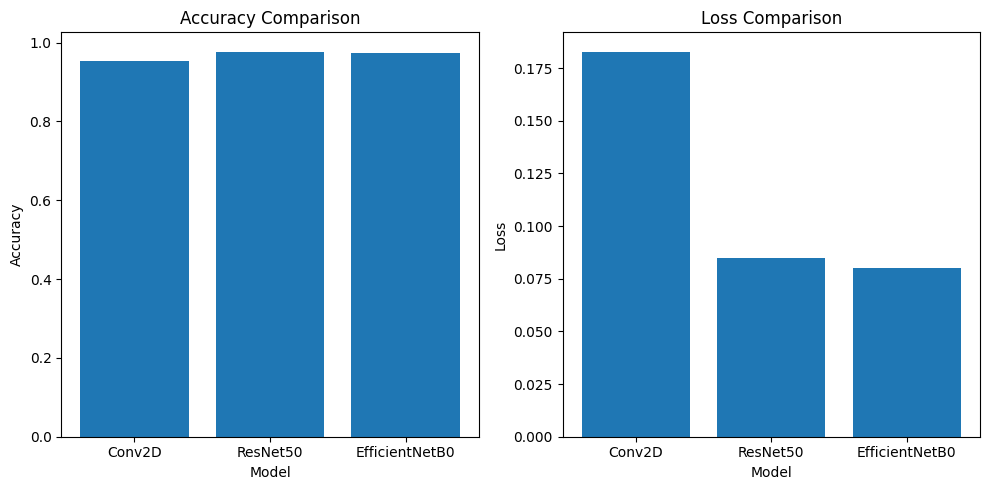

The best model is EfficientNetB0 with an accuracy of 0.97 and a loss of 0.08


In [149]:

# Plot the accuracy and loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(['Conv2D', 'ResNet50', 'EfficientNetB0'], [test1[1], test2[1], test3[1]])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

plt.subplot(1, 2, 2)
plt.bar(['Conv2D', 'ResNet50', 'EfficientNetB0'], [test1[0], test2[0], test3[0]])
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Loss Comparison')

plt.tight_layout()
plt.show()

# Calculate a score for each model based on both accuracy and loss
scores = []
for test in [test1, test2, test3]:
    score = test[1] / (1 + test[0])  # Higher accuracy and lower loss are better
    scores.append(score)

# Select the best model based on the score
best_model_index = np.argmax(scores)
best_model = ['Conv2D', 'ResNet50', 'EfficientNetB0'][best_model_index]
best_accuracy = [test1[1], test2[1], test3[1]][best_model_index]
best_loss = [test1[0], test2[0], test3[0]][best_model_index]

print(f'The best model is {best_model} with an accuracy of {best_accuracy:.2f} and a loss of {best_loss:.2f}')

# **Nuero-Fuzzy model**

In [136]:
import pandas as pd

# Load the datasets
wildfires_df = pd.read_csv('Historical_Wildfires.csv')
weather_df = pd.read_csv('HistoricalWeather.csv')

# Define a function to parse dates with multiple formats
def parse_dates(date_series):
    for fmt in ('%d-%m-%Y', '%d/%m/%Y', '%Y-%m-%d', '%m/%d/%Y'):
        try:
            return pd.to_datetime(date_series, format=fmt)
        except (ValueError, TypeError):
            continue
    return pd.to_datetime(date_series, errors='coerce')  # Coerce any non-matching formats to NaT

# Apply the function to the 'Date' columns in both datasets
wildfires_df['Date'] = parse_dates(wildfires_df['Date'])
weather_df['Date'] = parse_dates(weather_df['Date'])

# Drop any rows with NaT in the 'Date' column if any remain
wildfires_df.dropna(subset=['Date'], inplace=True)
weather_df.dropna(subset=['Date'], inplace=True)

# Change the format to dd/mm/yyyy
wildfires_df['Date'] = wildfires_df['Date'].dt.strftime('%d/%m/%Y')
weather_df['Date'] = weather_df['Date'].dt.strftime('%d/%m/%Y')

# Save the cleaned data back to CSV if needed
wildfires_df.to_csv('Cleaned_Historical_Wildfires.csv', index=False)
weather_df.to_csv('Cleaned_HistoricalWeather.csv', index=False)

# Display the first few rows of each dataset to verify the changes
wildfires_df.head(), weather_df.head()

(  Region        Date  Estimated_fire_area  Mean_estimated_fire_brightness  \
 0    NSW  04/01/2005              8.68000                      312.266667   
 1    NSW  05/01/2005             16.61125                      322.475000   
 2    NSW  06/01/2005              5.52000                      325.266667   
 3    NSW  07/01/2005              6.26400                      313.870000   
 4    NSW  08/01/2005              5.40000                      337.383333   
 
    Mean_estimated_fire_radiative_power  Mean_confidence  Std_confidence  \
 0                            42.400000        78.666667        2.886751   
 1                            62.362500        85.500000        8.088793   
 2                            38.400000        78.333333        3.214550   
 3                            33.800000        92.200000        7.529940   
 4                           122.533333        91.000000        7.937254   
 
    Var_confidence  Count Replaced  
 0        8.333333      3        R 

In [137]:
# Merge the datasets on 'Date' and 'Region'
merged_df = pd.merge(wildfires_df, weather_df, on=['Date', 'Region'], how='inner')

# Display the first few rows of the merged dataset to verify the merge
merged_df.head()

Region        Date  Estimated_fire_area  Mean_estimated_fire_brightness  \
0    NSW  04/01/2005                 8.68                      312.266667   
1    NSW  04/01/2005                 8.68                      312.266667   
2    NSW  04/01/2005                 8.68                      312.266667   
3    NSW  04/01/2005                 8.68                      312.266667   
4    NSW  04/01/2005                 8.68                      312.266667   

   Mean_estimated_fire_radiative_power  Mean_confidence  Std_confidence  \
0                                 42.4        78.666667        2.886751   
1                                 42.4        78.666667        2.886751   
2                                 42.4        78.666667        2.886751   
3                                 42.4        78.666667        2.886751   
4                                 42.4        78.666667        2.886751   

   Var_confidence  Count Replaced         Parameter  count()[unit: km^2]  \
0        8.333333      3        R     Precipitation        800234.348986   
1        8.333333      3        R  RelativeHumidity        800234.348986   
2        8.333333      3        R  SoilWaterContent        800234.348986   
3        8.333333      3        R    SolarRadiation        800234.348986   
4        8.333333      3        R       Temperature        800234.348986   

       min()      max()     mean()  variance()  
0   0.000000  22.842566   2.808620   17.383363  
1  31.279930  90.332771  57.095628  267.158378  
2   0.022578   0.444927   0.214293    0.009965  
3   7.576938  33.214062  22.617291   40.255460  
4  12.495799  28.945488  23.055527    9.455474

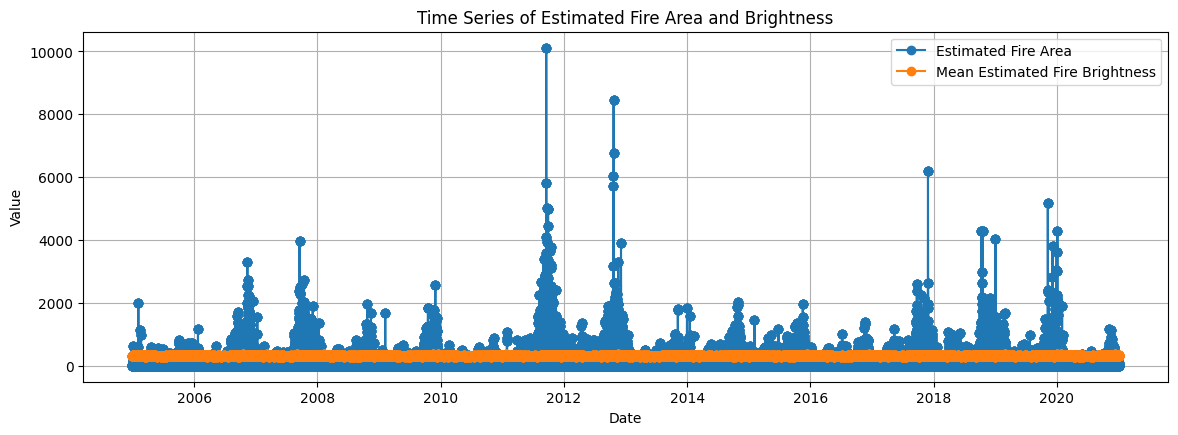

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned datasets
wildfires_df = pd.read_csv('Cleaned_Historical_Wildfires.csv')
weather_df = pd.read_csv('Cleaned_HistoricalWeather.csv')

# Merge the datasets
merged_df = pd.merge(wildfires_df, weather_df, on=['Date', 'Region'], how='inner')

# Convert 'Date' column to datetime for plotting
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d/%m/%Y')

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Plot time series of 'Estimated_fire_area' and 'Mean_estimated_fire_brightness' over time
plt.subplot(2, 1, 1)
plt.plot(merged_df['Date'], merged_df['Estimated_fire_area'], marker='o', label='Estimated Fire Area')
plt.plot(merged_df['Date'], merged_df['Mean_estimated_fire_brightness'], marker='o', label='Mean Estimated Fire Brightness')
plt.title('Time Series of Estimated Fire Area and Brightness')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

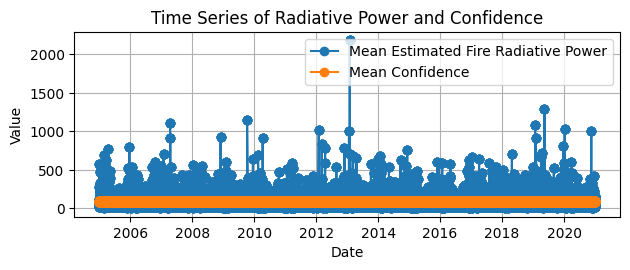

Text(0.5, 1.0, 'Fire Area vs Brightness')

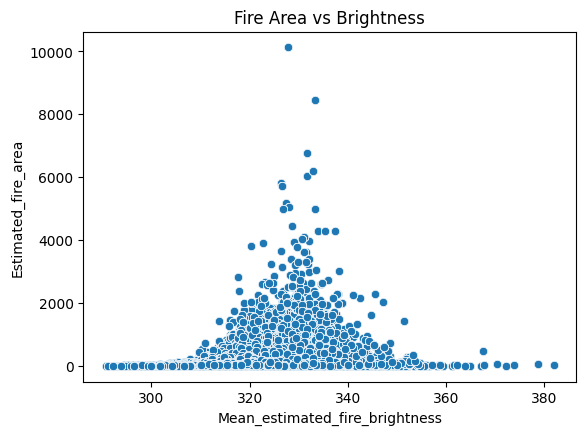

In [139]:
plt.subplot(2, 1, 2)
plt.plot(merged_df['Date'], merged_df['Mean_estimated_fire_radiative_power'], marker='o', label='Mean Estimated Fire Radiative Power')
plt.plot(merged_df['Date'], merged_df['Mean_confidence'], marker='o', label='Mean Confidence')
plt.title('Time Series of Radiative Power and Confidence')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Scatter plots
plt.figure(figsize=(14, 10))

# Scatter plot of 'Estimated_fire_area' vs 'Mean_estimated_fire_brightness'
plt.subplot(2, 2, 1)
sns.scatterplot(data=merged_df, x='Mean_estimated_fire_brightness', y='Estimated_fire_area')
plt.title('Fire Area vs Brightness')


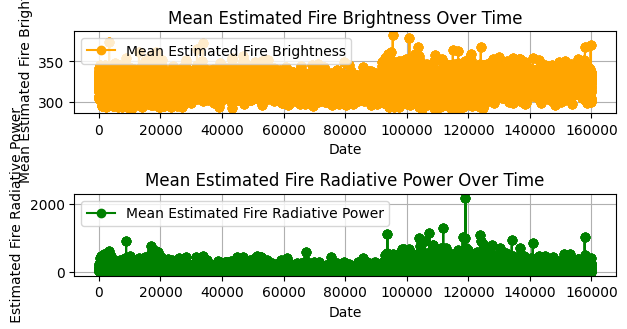

In [140]:
# Plot Mean Estimated Fire Brightness over time
plt.subplot(3, 1, 2)
plt.plot(merged_df.index, merged_df['Mean_estimated_fire_brightness'], marker='o', label='Mean Estimated Fire Brightness', color='orange')
plt.title('Mean Estimated Fire Brightness Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Estimated Fire Brightness')
plt.legend()
plt.grid(True)

# Plot Mean Estimated Fire Radiative Power over time
plt.subplot(3, 1, 3)
plt.plot(merged_df.index, merged_df['Mean_estimated_fire_radiative_power'], marker='o', label='Mean Estimated Fire Radiative Power', color='green')
plt.title('Mean Estimated Fire Radiative Power Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Estimated Fire Radiative Power')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



In [141]:
# Aggregated Monthly Data
# Set 'Date' column as index and ensure it's in datetime format
merged_df = merged_df.set_index('Date')
monthly_data = merged_df.resample('M').mean(numeric_only=True) # Include numeric_only to calculate the mean of numeric columns only

plt.figure(figsize=(14, 10))

# Seasonal Decomposition
# Ensure 'Estimated_fire_area' column has datetime index
decomposition = seasonal_decompose(merged_df['Estimated_fire_area'].dropna(), model='additive', period=365)  # Adjust period as needed

<Figure size 1400x1000 with 0 Axes>

In [142]:
# Define the target variable 'y' (Estimated_fire_area)
y = merged_df['Estimated_fire_area']

# Define the feature set 'X' by dropping 'Estimated_fire_area' and non-numeric columns
X = merged_df.drop('Estimated_fire_area', axis=1)
# Remove 'Date' and 'Region' as they are not present in the columns anymore
X = X.drop(['Region'], axis=1) # Drop 'Region' column

# Display the shapes of X and y to verify
X.shape, y.shape

((159832, 13), (159832,))

In [143]:
pip install scikit-fuzzy

In [144]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables for inputs
temp = ctrl.Antecedent(np.arange(0, 50, 1), 'Temperature')
humidity = ctrl.Antecedent(np.arange(0, 100, 1), 'RelativeHumidity')
wind_speed = ctrl.Antecedent(np.arange(0, 30, 1), 'WindSpeed')
precipitation = ctrl.Antecedent(np.arange(0, 100, 1), 'Precipitation')
time_of_day = ctrl.Antecedent(np.arange(0, 24, 1), 'TimeOfDay')
area = ctrl.Consequent(np.arange(0, 100, 1), 'Estimated_fire_area')

# Define membership functions for each variable
temp['low'] = fuzz.trimf(temp.universe, [0, 0, 25])
temp['high'] = fuzz.trimf(temp.universe, [25, 50, 50])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

wind_speed['low'] = fuzz.trimf(wind_speed.universe, [0, 0, 10])
wind_speed['medium'] = fuzz.trimf(wind_speed.universe, [5, 15, 25])
wind_speed['high'] = fuzz.trimf(wind_speed.universe, [15, 30, 30])

precipitation['low'] = fuzz.trimf(precipitation.universe, [0, 0, 50])
precipitation['high'] = fuzz.trimf(precipitation.universe, [50, 100, 100])

time_of_day['morning'] = fuzz.trimf(time_of_day.universe, [0, 6, 12])
time_of_day['afternoon'] = fuzz.trimf(time_of_day.universe, [10, 15, 20])
time_of_day['evening'] = fuzz.trimf(time_of_day.universe, [18, 24, 24])

area['small'] = fuzz.trimf(area.universe, [0, 0, 50])
area['medium'] = fuzz.trimf(area.universe, [25, 50, 75])
area['large'] = fuzz.trimf(area.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(temp['high'] & humidity['low'] & wind_speed['high'], area['large'])
rule2 = ctrl.Rule(temp['low'] & humidity['high'] & precipitation['high'], area['small'])
rule3 = ctrl.Rule(time_of_day['afternoon'] & wind_speed['medium'], area['medium'])
rule4 = ctrl.Rule(temp['high'] & time_of_day['evening'] & precipitation['low'], area['medium'])

# Create the control system and simulation
area_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
area_simulation = ctrl.ControlSystemSimulation(area_ctrl)



In [185]:
# Example input to predict the fire area
area_simulation.input['Temperature'] = 56
area_simulation.input['RelativeHumidity'] = 6
area_simulation.input['WindSpeed'] = 19
area_simulation.input['Precipitation'] = 10
area_simulation.input['TimeOfDay'] = 14

# Compute the result
area_simulation.compute()
predicted_area = area_simulation.output['Estimated_fire_area']
print(f"Predicted Fire Area: {predicted_area}")

Predicted Fire Area: 59.08796732642171


# **integration**

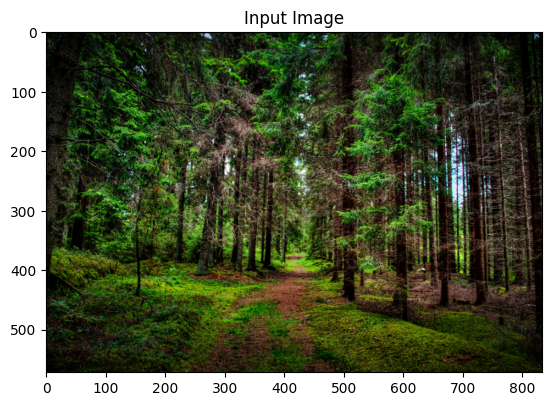

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Prediction raw value: 0.5160927772521973
Fire Detection: no fire, Estimated Fire Area: 50.00, Risk Level: Medium
🔍 No fire detected, medium fire risk. Increased monitoring recommended.


In [197]:

def preprocess_image(image):
    if image.shape[-1] == 4:  # Check if the image has an alpha channel (e.g., PNG)
        image = image[:, :, :3]  # Remove the alpha channel
    image = tf.image.resize(image, [180, 180])  # Resize to 180x180
    image = tf.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize pixel values
    return image

# Function to make fire detection prediction using the CNN model
def predict_fire(image):
    preprocessed_image = preprocess_image(image)
    prediction = best_model.predict(preprocessed_image)

    # Debugging: Print the raw prediction value
    print(f"Prediction raw value: {prediction[0][0]}")

    # Adjust threshold for fire detection
    return 'fire' if prediction[0][0] < 0.51606 else 'no fire'

# Function for neuro-fuzzy logic to estimate fire area and risk
def fuzzy_estimate_fire_area_and_risk(temp, humidity, wind_speed, precipitation, time_of_day):
    # Use your defined fuzzy variables and rules here
    area_simulation.input['Temperature'] = temp
    area_simulation.input['RelativeHumidity'] = humidity
    area_simulation.input['WindSpeed'] = wind_speed
    area_simulation.input['Precipitation'] = precipitation
    area_simulation.input['TimeOfDay'] = time_of_day

    # Compute the result using the fuzzy logic model
    area_simulation.compute()
    estimated_area = area_simulation.output['Estimated_fire_area']

    # Risk level based on estimated fire area (adjust thresholds if needed)
    if estimated_area > 70:
        risk_level = 'high'
    elif estimated_area > 30:
        risk_level = 'medium'
    else:
        risk_level = 'low'

    return estimated_area, risk_level

# Decision-making module that combines CNN and fuzzy logic results
def decision_module(fire_status, risk_level):
    if fire_status == "fire":
        print("🔥 Fire detected! Triggering immediate alert.")
        # Trigger emergency response here
    elif fire_status == "no fire" and risk_level == 'high':
        print("⚠️ No fire detected, but high fire risk predicted. Taking preventive actions.")
        # Issue preventive measures or warnings here
    elif fire_status == "no fire" and risk_level == 'medium':
        print("🔍 No fire detected, medium fire risk. Increased monitoring recommended.")
    else:
        print("✅ Monitoring: No immediate fire risk.")

# Function to combine CNN fire detection and neuro-fuzzy risk prediction
def integrated_fire_detection(image, temp, humidity, wind_speed, precipitation, time_of_day):
    # Step 1: Use CNN for fire detection
    fire_status = predict_fire(image)

    # Step 2: Use Neuro-Fuzzy Logic for fire area and risk estimation
    estimated_area, risk_level = fuzzy_estimate_fire_area_and_risk(temp, humidity, wind_speed, precipitation, time_of_day)

    print(f"Fire Detection: {fire_status}, Estimated Fire Area: {estimated_area:.2f}, Risk Level: {risk_level.capitalize()}")

    # Step 3: Decision-making based on fire detection and risk level
    decision_module(fire_status, risk_level)

# Example usage
image_path = '/content/Screenshot 2024-09-21 233742.png'  # Replace with your image path
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image)  # Decode image into a tensor

# Visualize the input image for debugging
plt.imshow(image.numpy().astype("uint8"))
plt.title("Input Image")
plt.show()

# Example environmental inputs for neuro-fuzzy logic system
temp = 30
humidity = 25
wind_speed = 12
precipitation = 5
time_of_day = 15  # 3 PM

# Load the best_model
# Replace this with your actual model loading code
best_model = model # Assuming 'model' is the variable holding your trained model

# Run the integrated system
integrated_fire_detection(image, temp, humidity, wind_speed, precipitation, time_of_day)